## Analysis of model coefficients

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
results_dir = os.path.join(cfg.results_dir, 'gene')

In [8]:
coefs_df = pd.DataFrame()
for identifier, coefs_list in au.generate_nonzero_coefficients(results_dir):
    coefs_list_df = pd.DataFrame({
        'gene': identifier.split('_')[0],
        'training_data': identifier.split('_')[1],
        'fold': list(range(len(coefs_list))),
        'nz_coefs': [len(l) for l in coefs_list]
    })
    coefs_df = pd.concat((coefs_df, coefs_list_df))
    
coefs_list_df.sort_values(by='nz_coefs', ascending=False).head()

,gene,training_data,fold,nz_coefs
2,HIST1H3B,expression,2,197
3,HIST1H3B,expression,3,90
0,HIST1H3B,expression,0,64
1,HIST1H3B,expression,1,52


Text(0.5, 0, 'Number of nonzero coefficients')

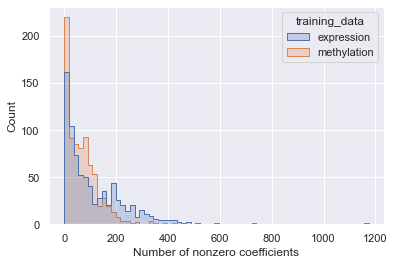

In [9]:
sns.set()
sns.histplot(data=coefs_df, x='nz_coefs', hue='training_data', element='step')
plt.xlabel('Number of nonzero coefficients')